<a href="https://colab.research.google.com/github/hollyagustine75/Data-Analytics-Course-Group-Work/blob/main/Case_Study_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import make_scorer, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets
X_data = pd.DataFrame(X)
Y_data = pd.DataFrame(y)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)


                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

In [ ]:
X_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False


In [ ]:
# Cek apakah ada data yang NULL
X_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

<ipython-input-5-f2901960ea99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VisitorType', data=X_data, palette='Set2')


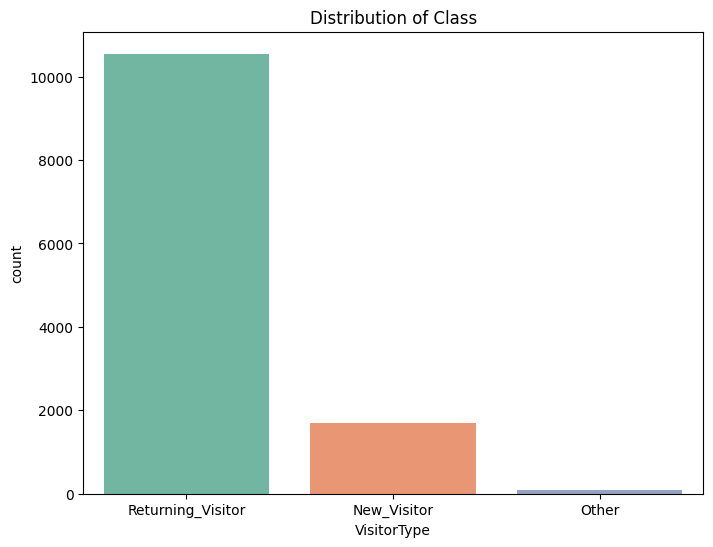

In [ ]:
#Check for imbalanced
plt.figure(figsize=(8, 6))
sns.countplot(x='VisitorType', data=X_data, palette='Set2')
plt.title('Distribution of Class')
plt.show()

In [ ]:
label_encoder = LabelEncoder()

X_data['Month'] = label_encoder.fit_transform(X_data['Month'])
X_data['VisitorType'] = label_encoder.fit_transform(X_data['VisitorType'])
Y_data['Revenue'] = label_encoder.fit_transform(Y_data['Revenue'])

<ipython-input-7-26f90471307c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=Y_data, palette='Set2')


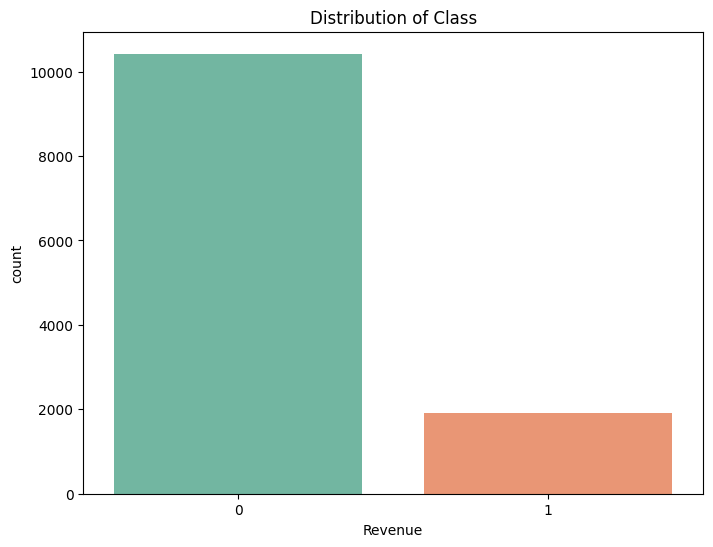

In [ ]:
#Check for imbalanced
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=Y_data, palette='Set2')
plt.title('Distribution of Class')
plt.show()

In [ ]:
Y_data = Y_data.values.ravel()

In [ ]:
# Split data jadi training data dan testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 134)

In [ ]:
# Scale the features
scaler = StandardScaler()
x_train= scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# KNN

In [ ]:
# Cari K yang optimal

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_ = knn.predict(x_test)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.8763179237631792 with K = 11


In [ ]:
# Classification

knn = KNeighborsClassifier(n_neighbors=1+test_accuracy.index(np.max(test_accuracy)))
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
score = knn.score(x_test, y_test)
knn_score_ = np.mean(score)

print('Accuracy : %.3f' % (knn_score_))

Accuracy : 0.876


# SVM

In [ ]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=10.0)

# Train the classifier
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print('Accuracy : %.3f' % (accuracy_svm))

Accuracy : 0.878


# Naive Bayes

In [ ]:
# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(x_test)

# Evaluate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy using Naive Bayes:", accuracy_nb)

Accuracy using Naive Bayes: 0.8041362530413625


# Results

In [ ]:
# Hasil Classification F1 tanpa kfold

print('F1 score tanpa Kfold')

f1_knn = f1_score(y_test, predicted, pos_label=0)
print('KNN F1-score: %.3f' % (f1_knn))

f1_svm = f1_score(y_test, y_pred_svm, pos_label=0)
print('SVM F1-score: %.3f' % (f1_svm))

f1_nb = f1_score(y_test, y_pred_nb, pos_label=0)
print('Naive Bayes F1-score: %.3f' % (f1_nb))

# Hasil Classification F1 dengan kfold

knn1_classifier = KNeighborsClassifier()
svm1_classifier = SVC(kernel='linear', C=10.0)
naivebayes1_classifier = GaussianNB()

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
f1_scores_knn = cross_val_score(knn1_classifier, x_test, y_test, cv=kf)

print()
print('KNN')
print("KNN F1 Scores with K-fold cross-validation:", f1_scores_knn)
print("KNN Average F1 Score:", f1_scores_knn.mean())

f1_scores_svm = cross_val_score(svm1_classifier, x_test, y_test, cv=kf)

print()
print('SVM')
print("SVM F1 Scores with K-fold cross-validation:", f1_scores_svm)
print("SVM Average F1 Score:", f1_scores_svm.mean())

f1_scores_nb = cross_val_score(naivebayes1_classifier, x_test, y_test, cv=kf)

print()
print('Naive Bayes')
print("Naive Bayes F1 Scores with K-fold cross-validation:", f1_scores_nb)
print("Naive Bayes Average F1 Score:", f1_scores_nb.mean())

F1 score tanpa Kfold
KNN F1-score: 0.930
SVM F1-score: 0.931
Naive Bayes F1-score: 0.878

KNN
KNN F1 Scores with K-fold cross-validation: [0.87246964 0.84584178 0.85801217 0.84584178 0.84989858]
KNN Average F1 Score: 0.8544127912228692

SVM
SVM F1 Scores with K-fold cross-validation: [0.90890688 0.86004057 0.87829615 0.87626775 0.86004057]
SVM Average F1 Score: 0.8767103826034113

Naive Bayes
Naive Bayes F1 Scores with K-fold cross-validation: [0.74898785 0.77890467 0.7464503  0.76673428 0.73225152]
Naive Bayes Average F1 Score: 0.7546657250084176
